In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def preprocess_data(filepath):
    """
    Loads and preprocesses the NIRF ranking data.

    Args:
        filepath (str): The path to the CSV file.

    Returns:
        tuple: A tuple containing the independent variable (X) and
               the dependent variable (y). Returns (None, None) on error.
    """
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
        return None, None

    # For this linear regression model, let's predict the 'Score' based on 'TLR' (Teaching, Learning & Resources).
    # We will select these two columns.
    # It's important to choose columns that are numeric and have a potential linear relationship.
    if 'Score' not in df.columns or 'TLR' not in df.columns:
        print("Error: The required columns 'Score' and 'TLR' are not in the CSV file.")
        return None, None

    # Drop rows with missing values in our columns of interest
    df = df.dropna(subset=['Score', 'TLR'])

    # Using .values returns a numpy array
    X = df['TLR'].values
    y = df['Score'].values

    return X, y

In [2]:
def numerical_matrix_method(X, y):
    """
    Calculates linear regression coefficients using the Normal Equation.

    Args:
        X (np.array): Independent variable.
        y (np.array): Dependent variable.

    Returns:
        tuple: A tuple containing the intercept and slope.
    """
    # Add a bias term (column of ones) to X for the intercept
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # Normal Equation: theta = inv(X_b.T * X_b) * X_b.T * y
    try:
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    except np.linalg.LinAlgError:
        print("Error: Could not compute the inverse of the matrix. The matrix might be singular.")
        return None, None
    intercept = theta_best[0]
    slope = theta_best[1]
    return intercept, slope

In [3]:
def gradient_descent_method(X, y, learning_rate=0.0001, n_iterations=10000):
    """
    Calculates linear regression coefficients using Gradient Descent.

    Args:
        X (np.array): Independent variable.
        y (np.array): Dependent variable.
        learning_rate (float): The learning rate.
        n_iterations (int): The number of iterations.

    Returns:
        tuple: A tuple containing the final intercept and slope.
    """
    m = len(X)
    # Initialize parameters
    intercept = 0
    slope = 0

    for _ in range(n_iterations):
        y_predicted = slope * X + intercept
        # Calculate gradients
        d_slope = (-2/m) * sum(X * (y - y_predicted))
        d_intercept = (-2/m) * sum(y - y_predicted)
        # Update parameters
        slope = slope - learning_rate * d_slope
        intercept = intercept - learning_rate * d_intercept

    return intercept, slope

In [4]:
def plot_results(X, y, intercept_matrix, slope_matrix, intercept_gd, slope_gd):
    """
    Plots the data and the best-fit lines from both models.
    """
    plt.figure(figsize=(12, 7))
    plt.scatter(X, y, alpha=0.6, label='Actual Data Points')

    # Line from Numerical Matrix Method
    y_pred_matrix = slope_matrix * X + intercept_matrix
    plt.plot(X, y_pred_matrix, color='red', linewidth=2, label=f'Best Fit Line (Matrix Method)')

    # Line from Gradient Descent Method
    y_pred_gd = slope_gd * X + intercept_gd
    plt.plot(X, y_pred_gd, color='green', linestyle='--', linewidth=2, label=f'Best Fit Line (Gradient Descent)')

    plt.title('Comparison of Linear Regression Models (NIRF Data)', fontsize=16)
    plt.xlabel('Teaching, Learning & Resources (TLR)', fontsize=12)
    plt.ylabel('Overall Score', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

--- Linear Regression Coefficients ---

Method 1: Numerical Matrix (Normal Equation)
   Intercept: 5.7091
   Slope (Coefficient): 0.7072

Method 2: Gradient Descent
   Intercept: 0.1771
   Slope (Coefficient): 0.7826


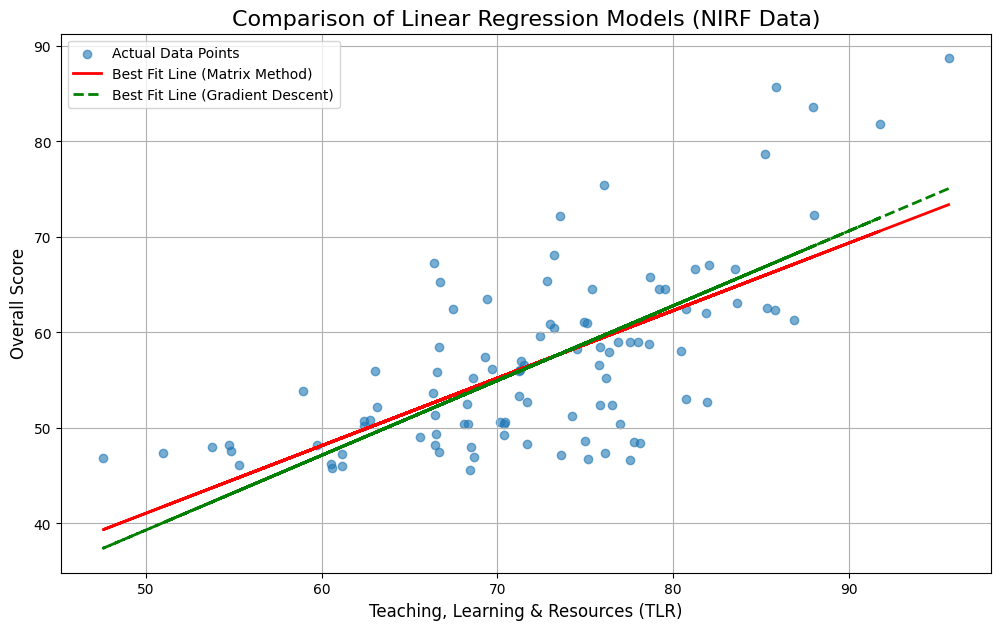

In [5]:
# --- Main Execution ---
if __name__ == "__main__":
    FILE_PATH = 'C:\\Sarvesh\\Mtech\\Foundation of Data Engineering\\Assignments\\EX 12\\ranking.csv'
    X_data, y_data = preprocess_data(FILE_PATH)

    if X_data is not None and y_data is not None:
        # 1. Numerical Matrix Method
        intercept_matrix, slope_matrix = numerical_matrix_method(X_data, y_data)

        # 2. Gradient Descent Method
        intercept_gd, slope_gd = gradient_descent_method(X_data, y_data)

        # 3. Comparison
        print("--- Linear Regression Coefficients ---")
        print("\nMethod 1: Numerical Matrix (Normal Equation)")
        if intercept_matrix is not None:
            print(f"   Intercept: {intercept_matrix:.4f}")
            print(f"   Slope (Coefficient): {slope_matrix:.4f}")
        else:
            print("   Could not calculate coefficients.")


        print("\nMethod 2: Gradient Descent")
        print(f"   Intercept: {intercept_gd:.4f}")
        print(f"   Slope (Coefficient): {slope_gd:.4f}")

        # 4. Plot for visual comparison
        if intercept_matrix is not None:
            plot_results(X_data, y_data, intercept_matrix, slope_matrix, intercept_gd, slope_gd)